In [5]:
import pandas as pd
path_file = ("C:/Users/NALINA/Downloads/Titanic-Dataset.csv")
titanic_data = pd.read_csv(path_file)

In [6]:
print(titanic_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [19]:
print(titanic_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [7]:
titanic_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'],inplace=True)

In [8]:
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].median())

In [9]:
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])

In [10]:
titanic_data['Sex'] = titanic_data['Sex'].map(lambda x: 1 if x == 'female' else 0)

In [11]:
Embarked_map = {'S': 0, 'C': 1, 'Q': 2}
titanic_data['Embarked'] = titanic_data['Embarked'].map(Embarked_map)

In [12]:
target = titanic_data['Survived']
features = titanic_data.drop('Survived', axis=1)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [14]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
predictions = rf_model.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score, classification_report
print("Model Accuracy:",accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test,predictions))

Model Accuracy: 0.8268156424581006

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



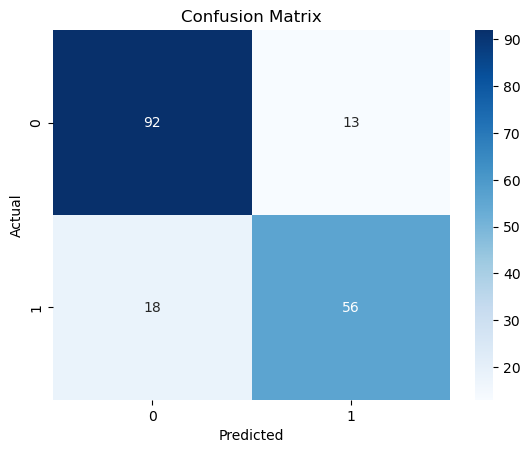

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

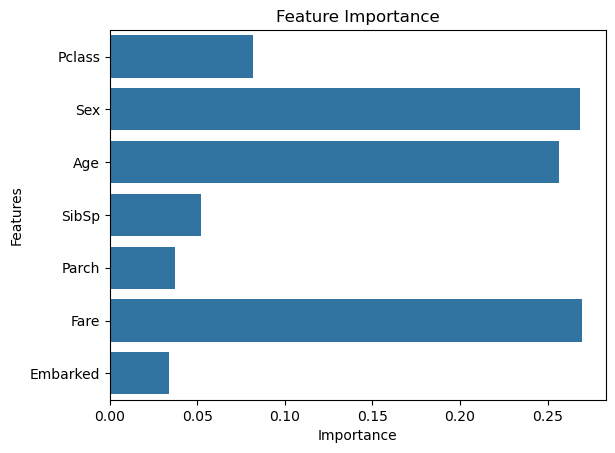

In [18]:
importance_values = rf_model.feature_importances_
feature_names = features.columns

sns.barplot(x=importance_values, y=feature_names)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()